M_star = 5.0e+10 [M_\odot] @ z = 0.6 --> \sigma = 179 [km/s]
sigma = 220 [km/s] @ z = 0.5 --> m_i = 21 [mag]
EXPECTED NUMBER OF LENSES AFTER PRIOR ON ZL, ZS, AND SIGMA:
   SUBARU HSC SuGOHI i band: 2.3e+04 (1.7e+04)
EXPECTED NUMBER OF LENSES AFTER PRIOR ON ZL, ZS, AND SIGMA:
   SUBARU HSC SuGOHI i band VDF Geng: 8806 (7139)


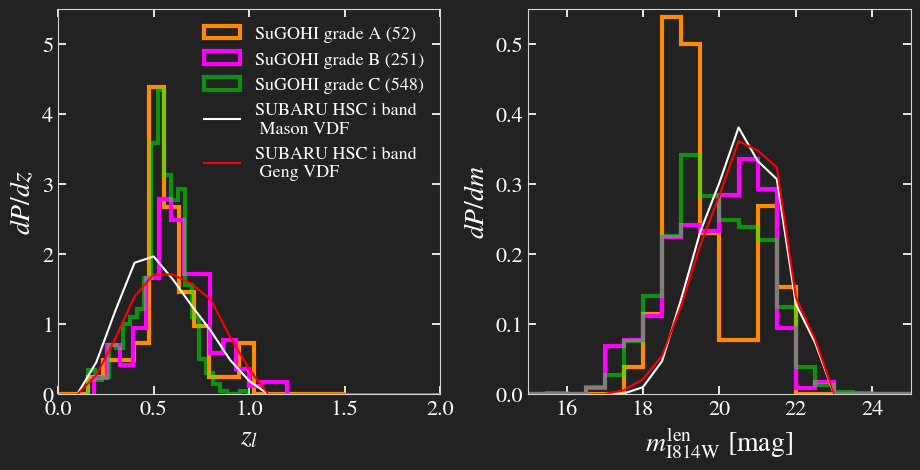

In [7]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

# import galess.LensStat.lens_stat as ls
# import galess.Utils.ls_utils as utils
# import galess.Plots.lens_plot as lens_plot
# import galess.HOD.HOD as HOD

path_root = os.path.split(os.path.abspath(''))[0]
sys.path.append(str(path_root) + '/galess/LensStat/')
sys.path.append(str(path_root) + '/galess/Utils/')
sys.path.append(str(path_root) + '/galess/Plots/')
sys.path.append(str(path_root) + '/galess/HOD/')
sys.path.append(str(path_root) + '/galess/RareLensStat/')
import lens_stat as ls
import ls_utils as utils
import lens_plot
import lens_plot_paper
import rare_lens_stat as rls

h = 0.7
___PLOT_FOR_KEYNOTE___ = 0

M_array     = np.linspace(-13 , -25 , 25)
sigma_array = np.linspace(100 , 400 , 31)
zl_array    = np.arange(0.  , 2.5 , 0.1)
zs_array    = np.arange(0.  , 5.4 , 0.2)

min_SNR     = 20
arc_mu_thr  = 3

surveys_titles = [
     'COSMOS HST i band',
     'CFHTLS i band',
     'SUBARU HSC SuGOHI i band',
     'DES i band',
     'COSMOS Web F115W', 'COSMOS Web F150W', 'COSMOS Web F277W',
     'PEARLS NEP F115W', 'PEARLS NEP F150W', 'PEARLS NEP F277W',
     'EUCLID Wide VIS', 'EUCLID Wide Y', 'EUCLID Wide J', 'EUCLID Wide H',
     'Roman HLWA J',
     'LSST i band', 'LSSTsinglevisit i band']

M_star, z = 5e10, 0.6
print(f'M_star = {M_star:.1e} [M_\odot] @ z = {z:.1f} --> \sigma = {ls.M_star_sigma_relation_Cannarozzo(M_star, z):.0f} [km/s]')
sigma, zl = 220, 0.5
mi = ls.app_magn_from_L_sigma_Nandini(sigma, zl, obs_band = 'sdss_i0')
print(f'sigma = {sigma:.0f} [km/s] @ z = {zl:.1f} --> m_i = {mi:.0f} [mag]')

lens_plot_paper.compare_SUGOHI(zl_array, zs_array, sigma_array, LENS_LIGHT = 1, SAVE = 1, DENSITY = 1, SMOOTH = 0, PLOT_FOR_KEYNOTE = 1)

In [8]:
a = ls.get_highest_LYA_rest_fram_observable('sdss_i0')
b = ls.get_highest_LYA_rest_fram_observable('ukirt_wfcam_H')
a, b

(5.276374345011393, 12.41646993016197)

In [9]:
import pandas as pd
AGEL_data = pd.read_csv('../galess/data/LENS_SEARCHES/AGEL/AGEL.csv')
AGEL_zl   = AGEL_data['z_l'].to_numpy()
AGEL_zs   = AGEL_data['z_s'].to_numpy()
print(AGEL_zl.shape, AGEL_zs.shape, AGEL_zl[0:3])
AGEL_zl, AGEL_zs = AGEL_zl[AGEL_zl<100], AGEL_zs[AGEL_zs<100]


(69,) (69,) [0.5685 0.463  0.495 ]


In [11]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)

zl, sigma, obs_band, M_V_lim = 0.4, 100, 'sdss_i0', -20

M_array_V = -2.5 * (4.86 * np.log10(sigma / 200) + 8.52)
Kc = ls.K_correction(zl, obs_band, 'sdss_g0', M_array_V)
obs_band_to_intr_UV_corr = 5 * np.log10(cosmo.luminosity_distance(zl).value * 1e5) + Kc
m_array_i = M_array_V + obs_band_to_intr_UV_corr
m_array_i, np.power(10, ((M_V_lim / -2.5) - 8.52) / 4.86) * 200


(24.463997170761843, 156.327042212364)

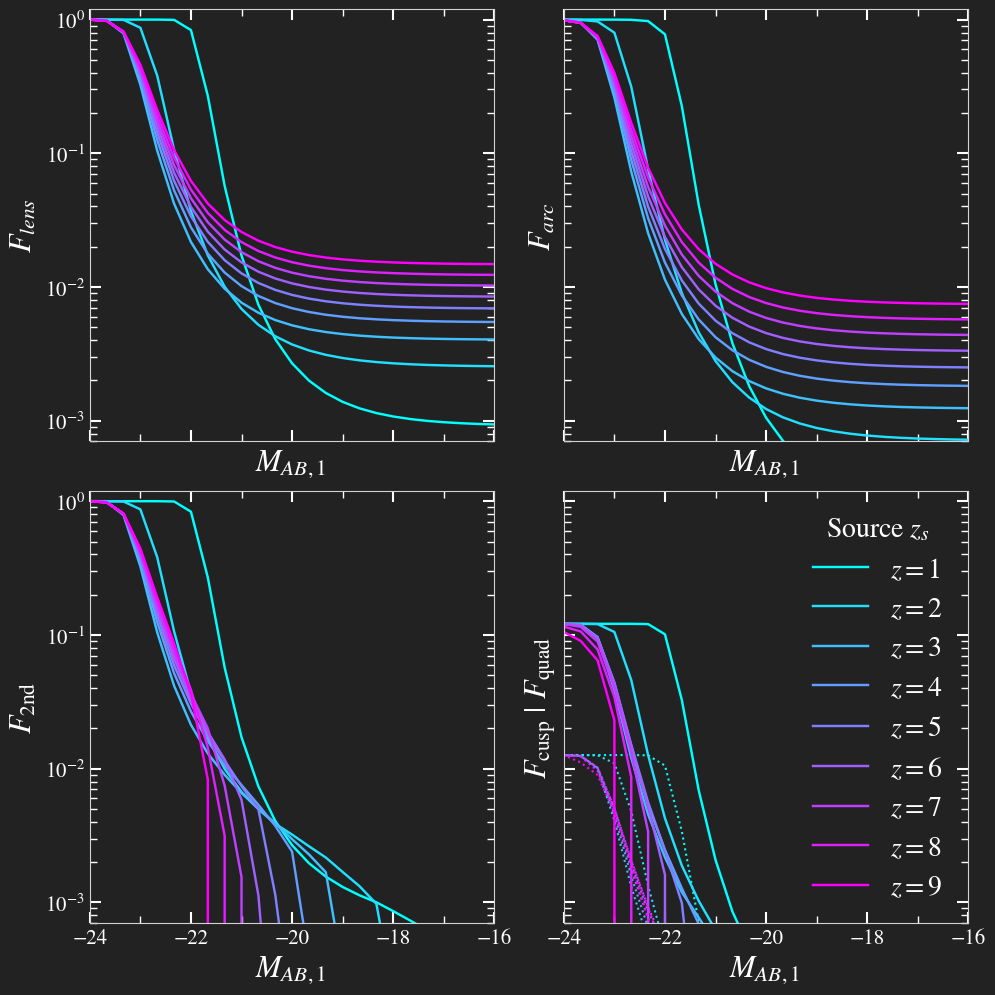

In [12]:
lens_plot_paper.plot_Lens_Fraction(PLOT_FOR_KEYNOTE = 1, SAVE = 1)

|     Survey - Filter     | PSF/Seeing ["] | Area [deg^2] | m_cut [mag] | m_lim [mag] |   N_lenses (LL)   |   N_lenses (LL)   | N [deg^-1] |
|                         |                |              |             |             | VDF: Mason + 2015 |  VDF: Geng + 2021 |            |

|    PEARLS NEP F150W     |           0.050|         0.015|         27.9|         28.9|        8 (   1   )|        3 (   1   )|   73 - 46  |
1.1146279230475697 7.7773504645948135


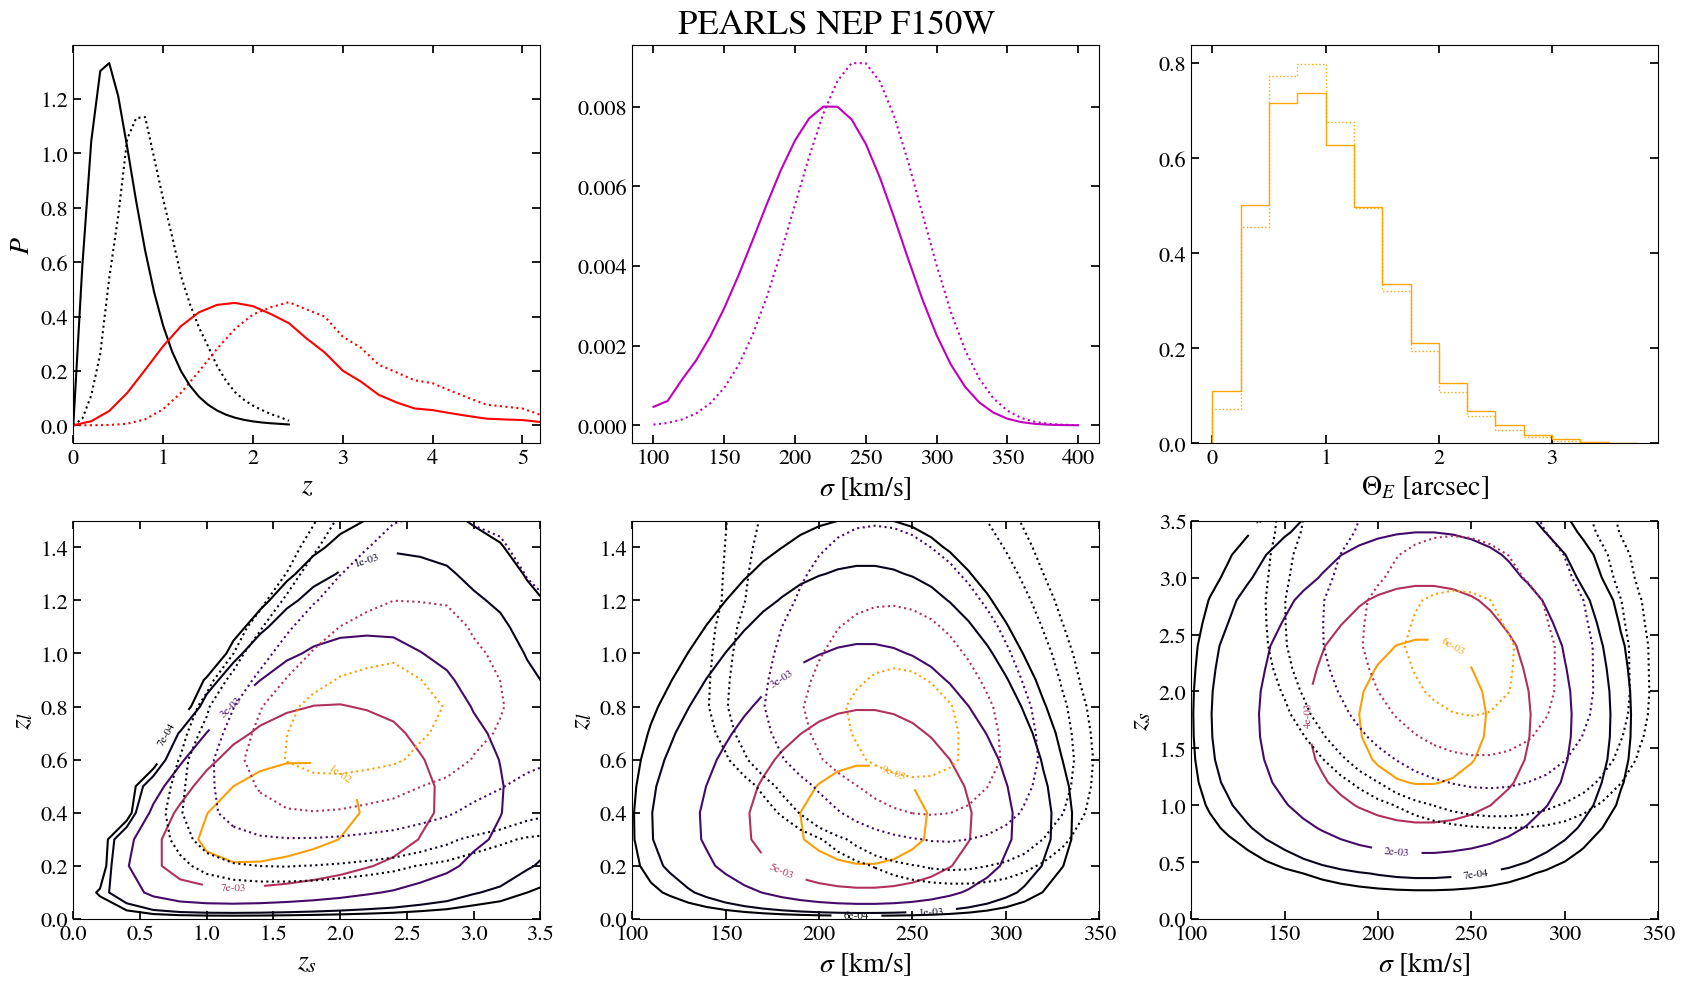

In [13]:
for title in ['PEARLS NEP F150W']:
     survey_params = utils.read_survey_params(title, VERBOSE = 0)
     limit    = survey_params['limit']
     cut      = survey_params['cut']
     area     = survey_params['area']
     seeing   = survey_params['seeing']
     exp_time_sec = survey_params['exp_time_sec']
     zero_point_m = survey_params['zero_point_m']
     sky_bckgnd_m = survey_params['sky_bckgnd_m']
     photo_band   = survey_params['photo_band']

     try:
          # raise (ValueError)
          matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL = utils.load_pickled_files(title)
     except ValueError:
          print('FILE do NOT exist - RUNNING MODEL')
          matrix_noLL, Theta_E_noLL, prob_noLL = ls.calculate_num_lenses_and_prob(
                                                                      sigma_array, zl_array, zs_array, M_array, limit, area,
                                                                      seeing, min_SNR, exp_time_sec, sky_bckgnd_m, zero_point_m,
                                                                      photo_band = photo_band, mag_cut=cut, arc_mu_threshold = arc_mu_thr,
                                                                      LENS_LIGHT_FLAG = False, SIE_FLAG = True)
          matrix_LL, Theta_E_LL, prob_LL = ls.calculate_num_lenses_and_prob(
                                                                      sigma_array, zl_array, zs_array, M_array, limit, area,
                                                                      seeing, min_SNR, exp_time_sec, sky_bckgnd_m, zero_point_m,
                                                                      photo_band = photo_band, mag_cut=cut, arc_mu_threshold = arc_mu_thr,
                                                                      LENS_LIGHT_FLAG = True, SIE_FLAG = True)
          utils.save_pickled_files(title,  matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL)
     utils.print_summary_surveys([title])
     lens_plot.set_plt_param(PLOT_FOR_KEYNOTE = ___PLOT_FOR_KEYNOTE___)
     # MASK_REGR2 = Theta_E_LL < 2
     # matrix_LL[MASK_REGR2] *= 0
     # matrix_noLL[MASK_REGR2] *= 0
     print(np.sum(matrix_LL), np.sum(matrix_noLL))
     lens_plot.plot_ALL_distributions(title, zl_array, zs_array, sigma_array,
                                   Theta_E_LL, matrix_LL, Theta_E_noLL, matrix_noLL,
                                   PLOT_FOR_KEYNOTE = ___PLOT_FOR_KEYNOTE___, SMOOTH = 1, SAVE = 1)

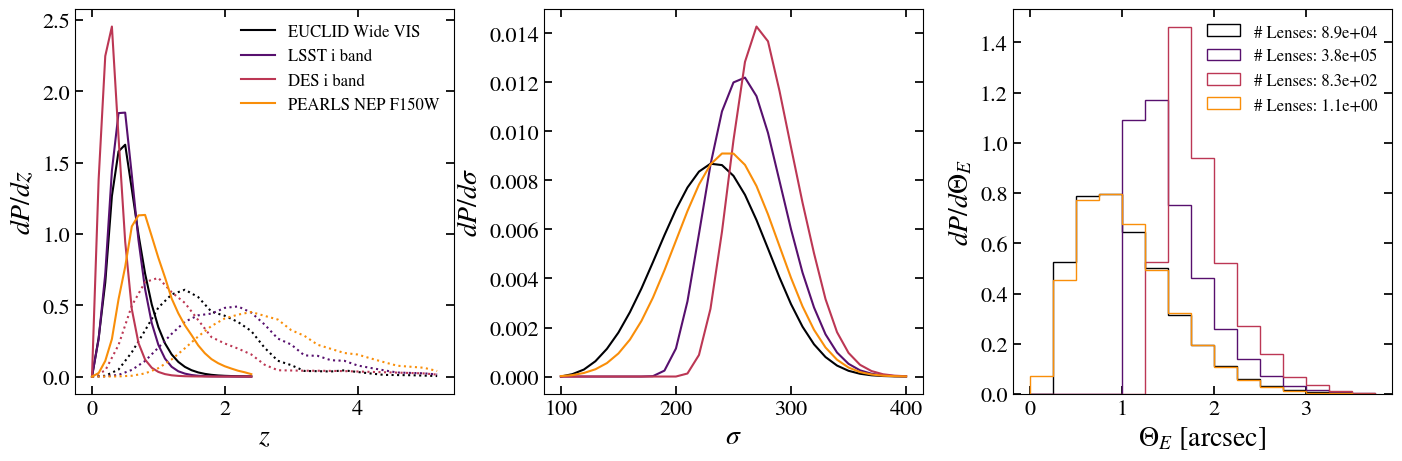

In [14]:
surveys_selection = ['EUCLID Wide VIS', 'LSST i band', 'DES i band', 'PEARLS NEP F150W']
# surveys_selection = ['COSMOS Web F115W', 'COSMOS Web F150W', 'COSMOS Web F277W']
# surveys_selection = surveys_titles
# lens_plot.compare_z_distributions_surveys(surveys_selection, sigma_array, zl_array, zs_array, PLOT_FOR_KEYNOTE = ___PLOT_FOR_KEYNOTE___)
# lens_plot.compare_sigma_distributions_surveys(surveys_selection, sigma_array, zl_array, zs_array, PLOT_FOR_KEYNOTE = ___PLOT_FOR_KEYNOTE___)
lens_plot.compare_ALL_distributions_surveys(surveys_selection, sigma_array, zl_array, zs_array, PLOT_FOR_KEYNOTE = ___PLOT_FOR_KEYNOTE___, SAVE = 1)

FILE do NOT exist - RUNNING MODEL


100%|██████████| 27/27 [00:27<00:00,  1.00s/it]


FILE do NOT exist - RUNNING MODEL LL


100%|██████████| 27/27 [00:59<00:00,  2.20s/it]


FILE do NOT exist - RUNNING MODEL


100%|██████████| 27/27 [00:27<00:00,  1.01s/it]


FILE do NOT exist - RUNNING MODEL LL


100%|██████████| 27/27 [00:59<00:00,  2.21s/it]


Area: 1.60 deg^2, Expected number of galaxies: 12 (4)
|     Survey - Filter     | PSF/Seeing ["] | Area [deg^2] | m_cut [mag] | m_lim [mag] |   N_lenses (LL)   |   N_lenses (LL)   | N [deg^-1] |
|                         |                |              |             |             | VDF: Mason + 2015 |  VDF: Geng + 2021 |            |

|    COSMOS HST i band    |           0.120|         1.600|         25.0|         26.5|       36 (  17   )|       11 (   7   )|   11 - 4   |
EXPECTED NUMBER OF LENSES AFTER PRIOR ON ZL, ZS, AND SIGMA:
   COSMOS HST i band Mason VDF: 8 (3)
   COSMOS HST i band Geng VDF: 8 (3)


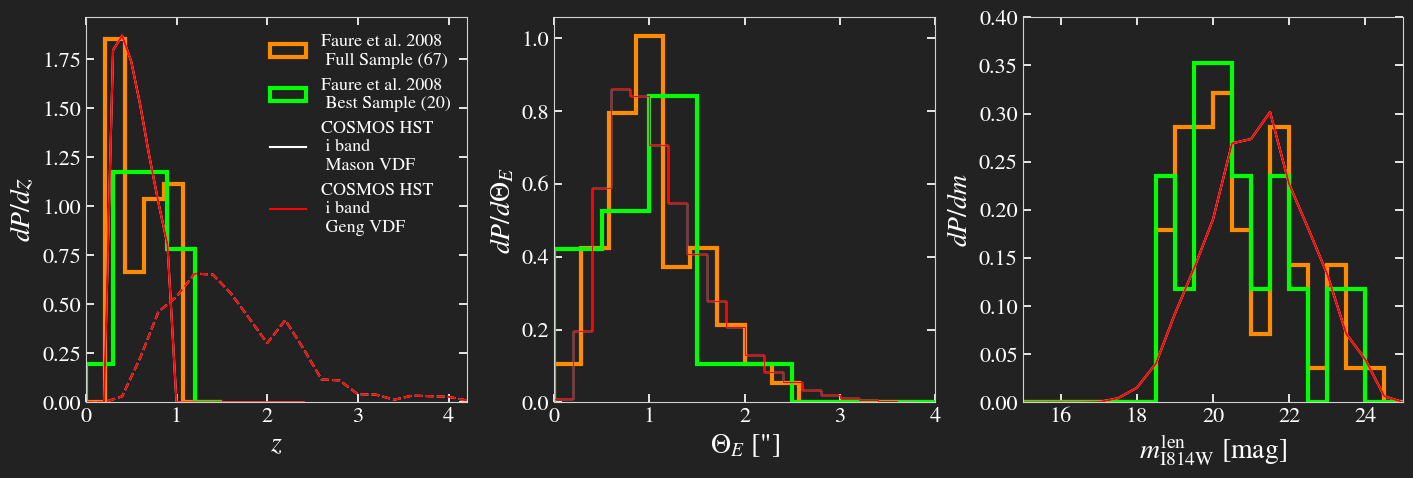

In [29]:
### COMPUTING FAURE COSMOS HST DISTRIBUTION ###
for title in ['COSMOS HST i band FAURE', 'COSMOS HST i band FAURE Geng']:
    survey_params = utils.read_survey_params('COSMOS HST i band', VERBOSE = 0)
    limit    = survey_params['limit']
    cut      = survey_params['cut']
    area     = survey_params['area']
    seeing   = survey_params['seeing']
    exp_time_sec = survey_params['exp_time_sec']
    zero_point_m = survey_params['zero_point_m']
    sky_bckgnd_m = survey_params['sky_bckgnd_m']
    photo_band   = survey_params['photo_band']

    sg_array_Faure = np.linspace(150 , 400 , 26) #sort of equiv to M_V<-20
    try:
        # raise(ValueError)
        matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL = utils.load_pickled_files(title)
        print(title)
        print(f'Number of lenses {int(np.sum(matrix_noLL[:][:][2:11]))} ({int(np.sum(matrix_LL[:][:][2:11]))})')
    except ValueError:
        print('FILE do NOT exist - RUNNING MODEL')
        matrix_noLL, Theta_E_noLL, prob_noLL = ls.calculate_num_lenses_and_prob(
                                                                    sg_array_Faure, zl_array, zs_array, M_array, limit, area,
                                                                    seeing, min_SNR, exp_time_sec, sky_bckgnd_m, zero_point_m,
                                                                    photo_band = photo_band, mag_cut=cut, arc_mu_threshold = arc_mu_thr,
                                                                    Phi_vel_disp = ls.Phi_vel_disp_Geng, LENS_LIGHT_FLAG = False, SIE_FLAG = True)
        print('FILE do NOT exist - RUNNING MODEL LL')
        matrix_LL, Theta_E_LL, prob_LL = ls.calculate_num_lenses_and_prob(
                                                                    sg_array_Faure, zl_array, zs_array, M_array, limit, area,
                                                                    seeing, min_SNR, exp_time_sec, sky_bckgnd_m, zero_point_m,
                                                                    photo_band = photo_band, mag_cut=cut, arc_mu_threshold = arc_mu_thr,
                                                                    Phi_vel_disp = ls.Phi_vel_disp_Geng, LENS_LIGHT_FLAG = True, SIE_FLAG = False)

        utils.save_pickled_files(title,  matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL)

print(f'Area: {area:.2f} deg^2, Expected number of galaxies: {np.sum(matrix_noLL):.0f} ({np.sum(matrix_LL):.0f})')
utils.print_summary_surveys(['COSMOS HST i band'])
m_obs = np.linspace(15, 30, 31)
lens_plot_paper.compare_COSMOS_HST_Faure(zl_array, zs_array, sg_array_Faure, M_array, cut,
                                        ONLY_FULL_SAMPLE = 1, LENS_LIGHT = 0, __MAG_OVER_ARCSEC_SQ__ = 0,
                                        PLOT_FOR_KEYNOTE = 1, SMOOTH =0, SAVE = 1)

CFHTLS i band
Number of lenses 974 (525)
CFHTLS i band Geng
Number of lenses 275 (243)
EXPECTED NUMBER OF LENSES AFTER PRIOR ON ZL, ZS, AND SIGMA:
   COSMOS HST i band Mason VDF: 763 (471)
EXPECTED NUMBER OF LENSES AFTER PRIOR ON ZL, ZS, AND SIGMA:
   COSMOS HST i band Geng VDF: 204 (184)


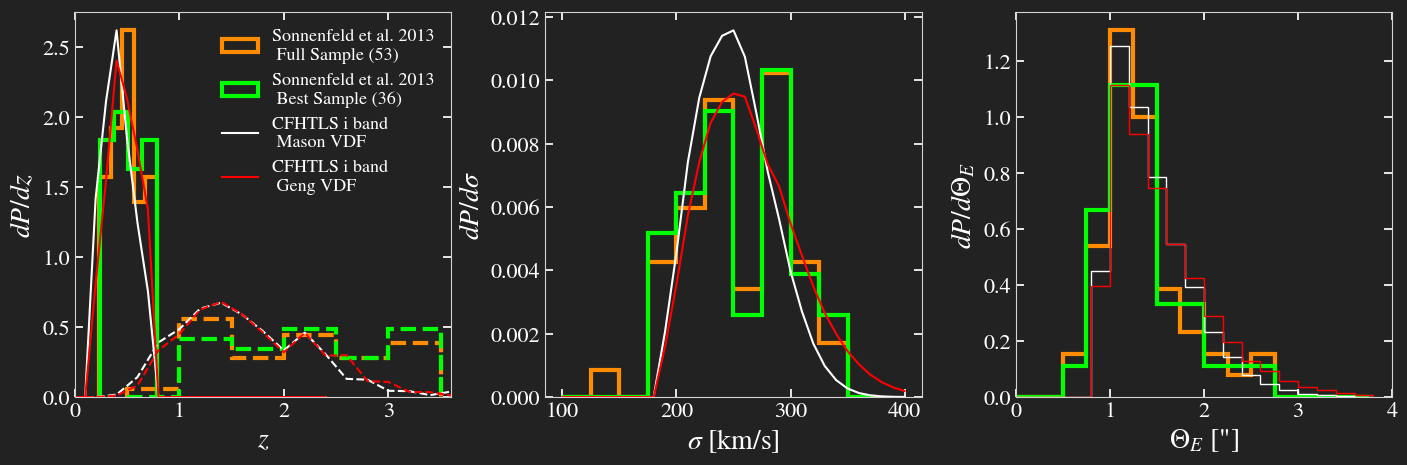

In [30]:
### COMPUTING Sonnenfeld SL2S DISTRIBUTION ###
for title in ['CFHTLS i band', 'CFHTLS i band Geng']:
    survey_params = utils.read_survey_params('CFHTLS i band', VERBOSE = 0)
    limit    = survey_params['limit']
    cut      = survey_params['cut']
    area     = survey_params['area']
    seeing   = survey_params['seeing']
    exp_time_sec = survey_params['exp_time_sec']
    zero_point_m = survey_params['zero_point_m']
    sky_bckgnd_m = survey_params['sky_bckgnd_m']
    photo_band   = survey_params['photo_band']

    try:
        # raise(ValueError)
        matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL = utils.load_pickled_files(title)
        print(title)
        print(f'Number of lenses {int(np.sum(matrix_noLL))} ({int(np.sum(matrix_LL))})')
    except ValueError:
        print('FILE do NOT exist - RUNNING MODEL')
        matrix_noLL, Theta_E_noLL, prob_noLL = ls.calculate_num_lenses_and_prob(
                                                                    sigma_array, zl_array, zs_array, M_array, limit, area,
                                                                    seeing, min_SNR, exp_time_sec, sky_bckgnd_m, zero_point_m,
                                                                    photo_band = photo_band, mag_cut=cut, arc_mu_threshold = arc_mu_thr,
                                                                    Phi_vel_disp = ls.Phi_vel_disp_Mason, LENS_LIGHT_FLAG = False, SIE_FLAG = True)
        print('FILE do NOT exist - RUNNING MODEL LL')
        matrix_LL, Theta_E_LL, prob_LL = ls.calculate_num_lenses_and_prob(
                                                                    sigma_array, zl_array, zs_array, M_array, limit, area,
                                                                    seeing, min_SNR, exp_time_sec, sky_bckgnd_m, zero_point_m,
                                                                    photo_band = photo_band, mag_cut=cut, arc_mu_threshold = arc_mu_thr,
                                                                    Phi_vel_disp = ls.Phi_vel_disp_Mason, LENS_LIGHT_FLAG = True, SIE_FLAG = False)

        utils.save_pickled_files(title,  matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL)
lens_plot.compare_SL2S(zl_array, zs_array, sigma_array, LENS_LIGHT = 1,  PLOT_FOR_KEYNOTE = 1, SMOOTH = 0, SAVE = 1)

DES i band_muarc5 <function Phi_vel_disp_Mason at 0x13c2563e0>
Number of lenses 1822 (667)
Number of lenses 479 (180)
DES i band Geng_muarc5 <function Phi_vel_disp_Geng at 0x13c256480>
Number of lenses 439 (227)
Number of lenses 139 (75)
EXPECTED NUMBER OF LENSES AFTER PRIOR ON ZL, ZS, AND SIGMA:
   DES i band Mason VDF: 1822 (828)
   DES i band Geng VDF: 411 (297)


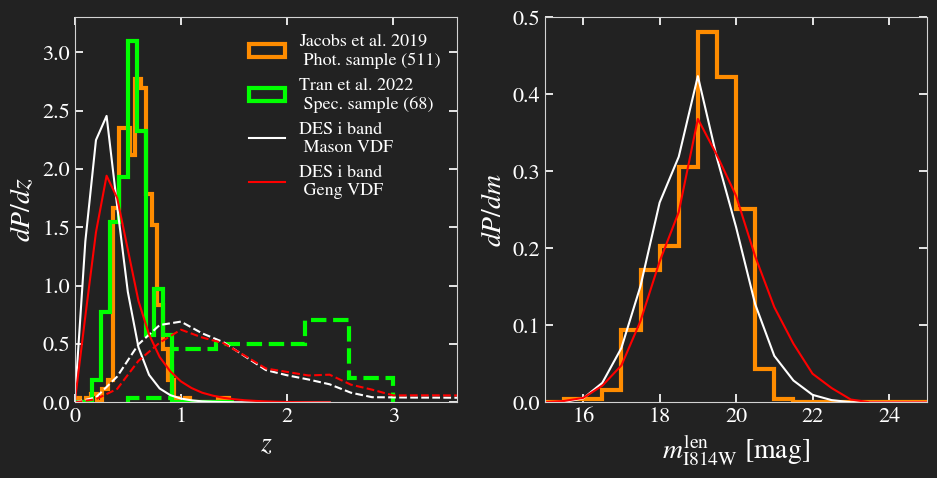

In [17]:
# utils.print_summary_surveys(['DES i band'])
for title in ['DES i band', 'DES i band Geng']:
    survey_params = utils.read_survey_params('DES i band', VERBOSE = 0)
    limit    = survey_params['limit']
    cut      = survey_params['cut']
    area     = survey_params['area']
    seeing   = survey_params['seeing']
    exp_time_sec = survey_params['exp_time_sec']
    zero_point_m = survey_params['zero_point_m']
    sky_bckgnd_m = survey_params['sky_bckgnd_m']
    photo_band   = survey_params['photo_band']
    VDF = ls.Phi_vel_disp_Geng if title == 'DES i band Geng' else ls.Phi_vel_disp_Mason
    arc_mu_thr = 5
    title = title + '_muarc5'
    try:
        # raise (ValueError)
        matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL = utils.load_pickled_files(title)
    except ValueError:
        print('FILE do NOT exist - RUNNING MODEL')
        matrix_noLL, Theta_E_noLL, prob_noLL = ls.calculate_num_lenses_and_prob(
                                                                    sigma_array, zl_array, zs_array, M_array, limit, area,
                                                                    seeing, min_SNR, exp_time_sec, sky_bckgnd_m, zero_point_m,
                                                                    photo_band = photo_band, mag_cut=cut, arc_mu_threshold = arc_mu_thr,
                                                                    Phi_vel_disp = VDF, LENS_LIGHT_FLAG = False, SIE_FLAG = True)
        matrix_LL, Theta_E_LL, prob_LL = ls.calculate_num_lenses_and_prob(
                                                                    sigma_array, zl_array, zs_array, M_array, limit, area,
                                                                    seeing, min_SNR, exp_time_sec, sky_bckgnd_m, zero_point_m,
                                                                    photo_band = photo_band, mag_cut=cut, arc_mu_threshold = arc_mu_thr,
                                                                    Phi_vel_disp = VDF, LENS_LIGHT_FLAG = True, SIE_FLAG = True)
        utils.save_pickled_files(title,  matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL)
    # utils.print_summary_surveys([title])
    print(title, VDF)
    matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL = utils.load_pickled_files(title)
    print(f'Number of lenses {int(np.sum(matrix_noLL))} ({int(np.sum(matrix_LL))})')
    MASK_REGR2 = Theta_E_LL < 2
    matrix_LL[MASK_REGR2] *= 0
    matrix_noLL[MASK_REGR2] *= 0
    print(f'Number of lenses {int(np.sum(matrix_noLL))} ({int(np.sum(matrix_LL))})')
lens_plot_paper.compare_JACOBS_CNN_DES(zl_array, zs_array, sigma_array,
                                      LENS_LIGHT = 1,  PLOT_FOR_KEYNOTE = 1, SAVE = 1, DENSITY = 1, MU5 = 0)

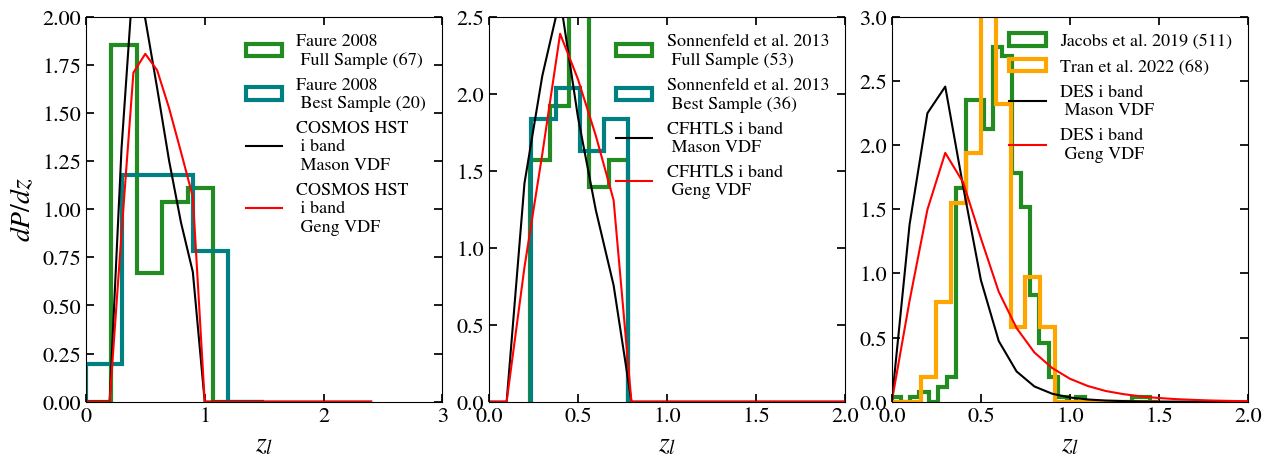

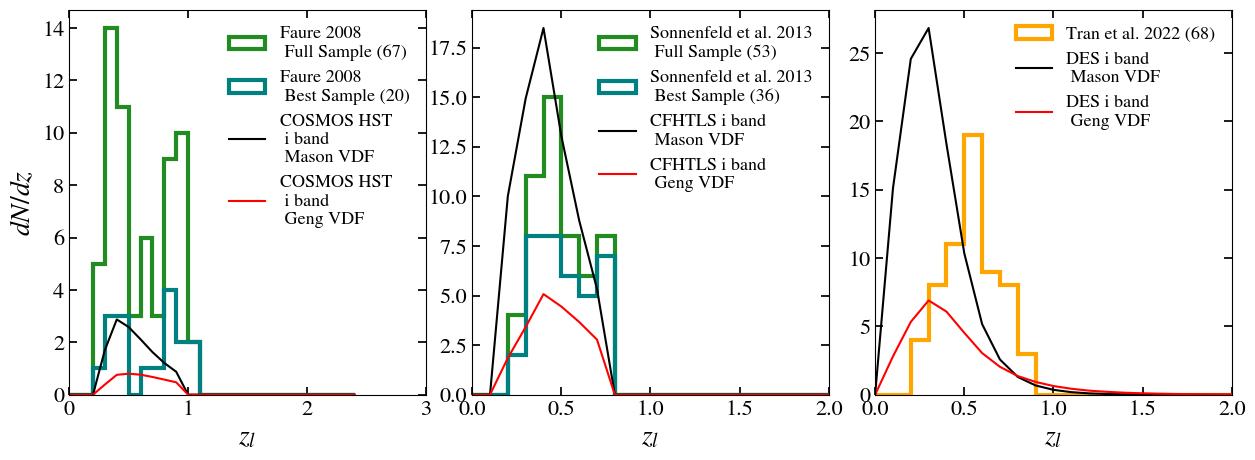

In [18]:
lens_plot_paper.compare_all_searches_z(zl_array, zs_array, sigma_array, LENS_LIGHT = 1, SAVE = 1, DENSITY = 1, SMOOTH = 0)
lens_plot_paper.compare_all_searches_z(zl_array, zs_array, sigma_array, LENS_LIGHT = 1, SAVE = 1, DENSITY = 0, SMOOTH = 0)

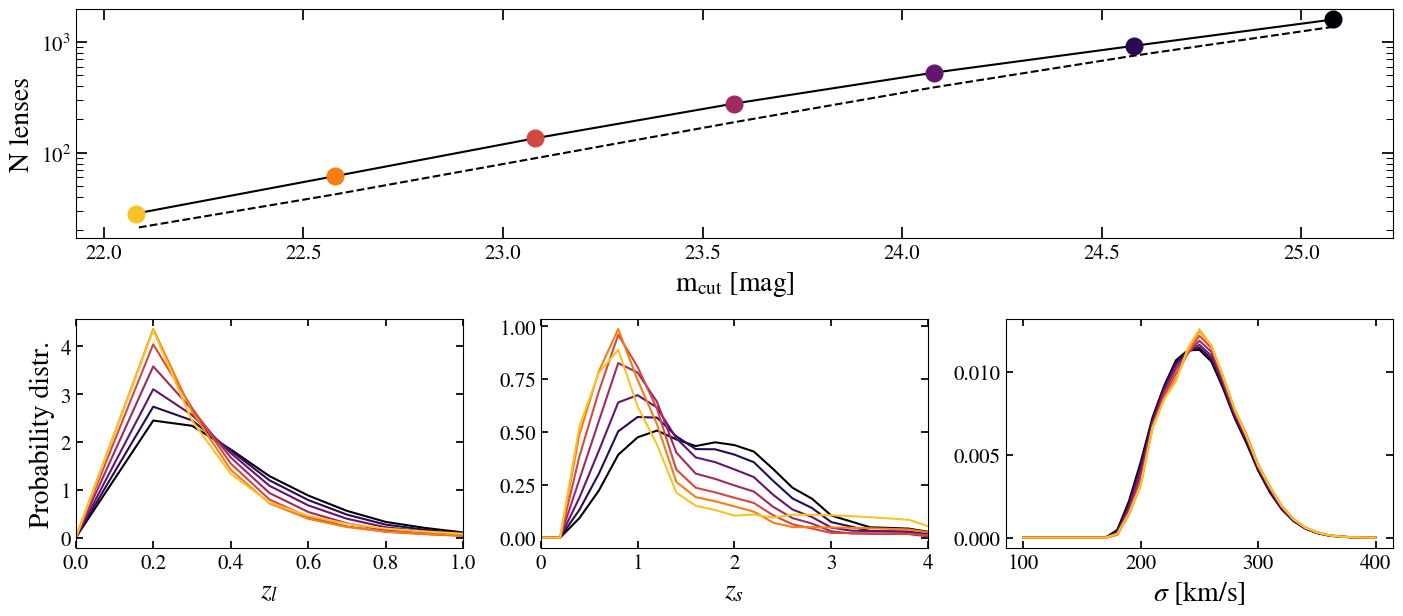

In [19]:
### COMPUTING effect of m_cut on the number of lenses and the parameters distributions ###
title = 'CFHTLS i band'
survey_params = utils.read_survey_params('CFHTLS i band', VERBOSE = 0)
arc_mu_thr = 3
min_SNR    = 20
limit    = survey_params['limit']
cut      = survey_params['cut']
area     = survey_params['area']
seeing   = survey_params['seeing']
exp_time_sec = survey_params['exp_time_sec']
zero_point_m = survey_params['zero_point_m']
sky_bckgnd_m = survey_params['sky_bckgnd_m']
photo_band   = survey_params['photo_band']
zl_array_CFHTLS = np.linspace(0.2 , 1.0 , 9)
zs_array_CFHTLS = np.linspace(0.2 , 4   , 20)
sg_array_CFHTLS = np.linspace(100 , 400 , 31)


_title_ = 'CFHTLS i band_mcut_'
delta_cut_limit = np.arange(0, 3.25, 0.5)
gal_num_vs_mcut, gal_num_vs_mcut_LL = np.zeros(0), np.zeros(0)
for iid, dlt in enumerate(delta_cut_limit):
    cut   = limit - dlt
    title = _title_ + str(iid)
    try:
        # raise(ValueError)
        matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL = utils.load_pickled_files(title)
    except ValueError:
        print('FILE do NOT exist - RUNNING MODEL')
        matrix_noLL, Theta_E_noLL, prob_noLL = ls.calculate_num_lenses_and_prob(
                                                                    sg_array_CFHTLS, zl_array_CFHTLS, zs_array_CFHTLS, M_array, limit, area,
                                                                    seeing, min_SNR, exp_time_sec, sky_bckgnd_m, zero_point_m,
                                                                    photo_band = photo_band, mag_cut=cut, arc_mu_threshold = arc_mu_thr,
                                                                    LENS_LIGHT_FLAG = False, SIE_FLAG = True)
        print('FILE do NOT exist - RUNNING MODEL LL')
        matrix_LL, Theta_E_LL, prob_LL = ls.calculate_num_lenses_and_prob(
                                                                    sg_array_CFHTLS, zl_array_CFHTLS, zs_array_CFHTLS, M_array, limit, area,
                                                                    seeing, min_SNR, exp_time_sec, sky_bckgnd_m, zero_point_m,
                                                                    photo_band = photo_band, mag_cut=cut, arc_mu_threshold = arc_mu_thr,
                                                                    LENS_LIGHT_FLAG = True, SIE_FLAG = False)

        utils.save_pickled_files(title,  matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL)
    gal_num_vs_mcut = np.append(gal_num_vs_mcut, np.sum(matrix_noLL))
    gal_num_vs_mcut_LL = np.append(gal_num_vs_mcut_LL, np.sum(matrix_LL))

line_c, cmap_c, _col_, col_A, col_B, col_C, col_D, fn_prefix = lens_plot.set_plt_param(___PLOT_FOR_KEYNOTE___)
_c_ = 'w' if ___PLOT_FOR_KEYNOTE___ else 'k'
fig = plt.figure(figsize=(17, 7))
grid = plt.GridSpec(2, 3, wspace=0.2, hspace=0.35)
ax1 = fig.add_subplot(grid[0, :])
ax2 = fig.add_subplot(grid[1, 0])
ax3 = fig.add_subplot(grid[1, 1])
ax4 = fig.add_subplot(grid[1, 2])
ax1.plot(limit - delta_cut_limit, gal_num_vs_mcut, c = _c_)
ax1.plot(limit - delta_cut_limit, gal_num_vs_mcut_LL, c = _c_, ls='--')
_col_  = iter(cmap_c(np.linspace(0, 1, len(delta_cut_limit)+1)))
for iid, dlt in enumerate(delta_cut_limit):
    ccc = next(_col_)
    title = _title_ + str(iid)
    matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL = utils.load_pickled_files(title)
    _ , __  , ___, P_zs_LL   , P_zl_LL  , P_sg_LL   = ls.get_N_and_P_projections(matrix_LL, sg_array_CFHTLS, zl_array_CFHTLS, zs_array_CFHTLS, SMOOTH=0)
    _ , __  , ___, P_zs_noLL , P_zl_noLL  , P_sg_noLL   = ls.get_N_and_P_projections(matrix_noLL, sg_array_CFHTLS, zl_array_CFHTLS, zs_array_CFHTLS, SMOOTH=0)
    _ , __  , ___, P_zs_LL_sm   , P_zl_LL_sm  , P_sg_LL_sm   = ls.get_N_and_P_projections(matrix_LL, sg_array_CFHTLS, zl_array_CFHTLS, zs_array_CFHTLS, SMOOTH=1)
    _ , __  , ___, P_zs_noLL_sm , P_zl_noLL_sm  , P_sg_noLL_sm   = ls.get_N_and_P_projections(matrix_noLL, sg_array_CFHTLS, zl_array_CFHTLS, zs_array_CFHTLS, SMOOTH=1)
    ax1.plot(limit - dlt, np.sum(matrix_noLL), marker='o', c = ccc, ms = 12)
    ax2.plot(np.append(0,zl_array_CFHTLS), np.append(0,P_zl_noLL), c=ccc, ls='-', label=str(limit - dlt))
    ax3.plot(np.append(0,zs_array_CFHTLS), np.append(0,P_zs_noLL_sm), c=ccc, ls='-')
    ax4.plot(sg_array_CFHTLS, P_sg_noLL, c=ccc, ls='-')
ax1.set_yscale('log')
ax2.set_xlim((0,1.))
ax3.set_xlim((0,4.))
__size_labels__, __size_ticks__ = 20, 15
ax1.set_xlabel(r'm$_\text{cut}$ [mag]', fontsize=__size_labels__)
ax1.set_ylabel(r'N lenses' , fontsize=__size_labels__)
ax2.set_xlabel(r'$z_l$'    , fontsize=__size_labels__)
ax3.set_xlabel(r'$z_s$'    , fontsize=__size_labels__)
ax4.set_xlabel(r'$\sigma$ [km/s]', fontsize=__size_labels__)
ax2.set_ylabel(r'Probability distr.', fontsize=__size_labels__)
ax1.tick_params(axis='both', which = 'major', labelsize=__size_ticks__, direction = 'in', length = 8)
ax1.tick_params(axis='both', which = 'minor', labelsize=__size_ticks__, direction = 'in', length = 5)
ax2.tick_params(axis='both', which = 'both', labelsize=__size_ticks__, direction = 'in', length = 5)
ax3.tick_params(axis='both', which = 'both', labelsize=__size_ticks__, direction = 'in', length = 5)
ax4.tick_params(axis='both', which = 'both', labelsize=__size_ticks__, direction = 'in', length = 5)
plt.savefig('img/effect_mcut.png', dpi=200, bbox_inches='tight')
plt.show()

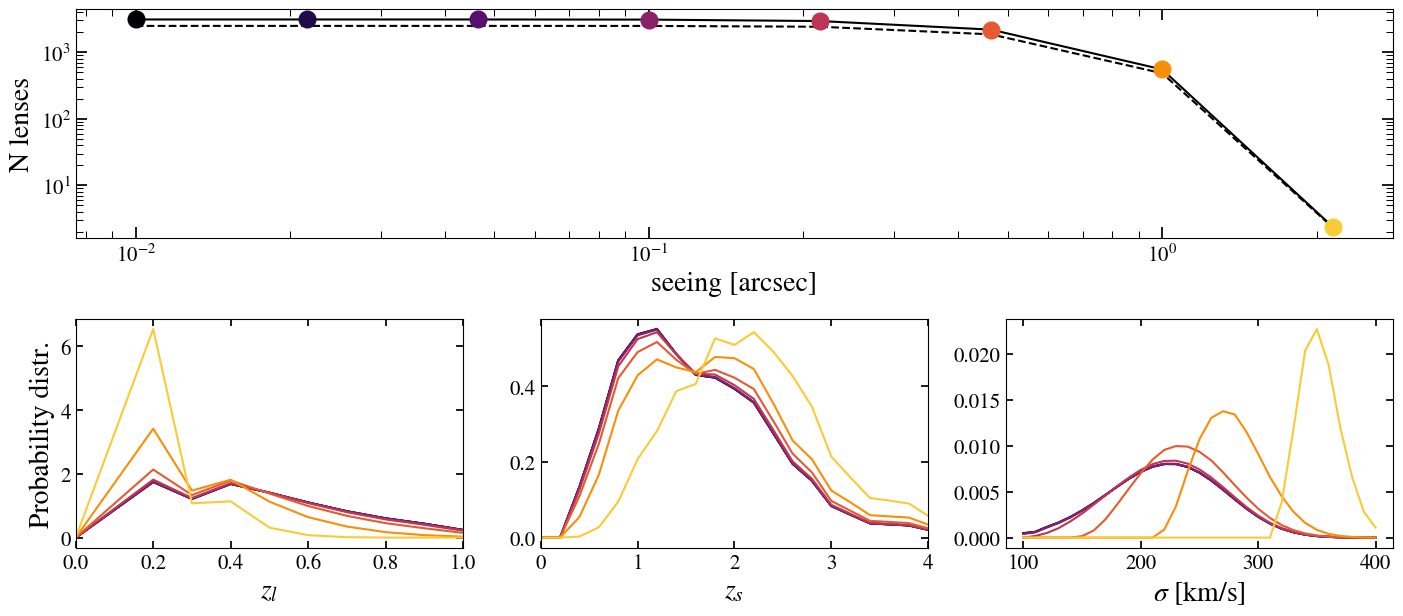

In [20]:
### COMPUTING effect of seeing on the number of lenses and the parameters distributions ###
title = 'CFHTLS i band'
survey_params = utils.read_survey_params('CFHTLS i band', VERBOSE = 0)
arc_mu_thr = 3
min_SNR    = 20
limit    = survey_params['limit']
cut      = survey_params['cut']
area     = survey_params['area']
#seeing   = survey_params['seeing']
exp_time_sec = survey_params['exp_time_sec']
zero_point_m = survey_params['zero_point_m']
sky_bckgnd_m = survey_params['sky_bckgnd_m']
photo_band   = survey_params['photo_band']
zl_array_CFHTLS = np.linspace(0.2 , 1.0 , 9)
zs_array_CFHTLS = np.linspace(0.2 , 4   , 20)
sg_array_CFHTLS = np.linspace(100 , 400 , 31)
_title_ = 'CFHTLS i band_seeing_'
cut   = limit
seeing_array = np.logspace(-2, 1, 10)[:8]
gal_num_vs_mcut, gal_num_vs_mcut_LL = np.zeros(0), np.zeros(0)
for sid, seeing in enumerate(seeing_array):
    title = _title_ + str(sid)
    try:
        # raise(ValueError)
        matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL = utils.load_pickled_files(title)
    except ValueError:
        print('FILE do NOT exist - RUNNING MODEL')
        matrix_noLL, Theta_E_noLL, prob_noLL = ls.calculate_num_lenses_and_prob(
                                                                    sg_array_CFHTLS, zl_array_CFHTLS, zs_array_CFHTLS, M_array, limit, area,
                                                                    seeing, min_SNR, exp_time_sec, sky_bckgnd_m, zero_point_m,
                                                                    photo_band = photo_band, mag_cut=cut, arc_mu_threshold = arc_mu_thr,
                                                                    LENS_LIGHT_FLAG = False, SIE_FLAG = True)
        print('FILE do NOT exist - RUNNING MODEL LL')
        matrix_LL, Theta_E_LL, prob_LL = ls.calculate_num_lenses_and_prob(
                                                                    sg_array_CFHTLS, zl_array_CFHTLS, zs_array_CFHTLS, M_array, limit, area,
                                                                    seeing, min_SNR, exp_time_sec, sky_bckgnd_m, zero_point_m,
                                                                    photo_band = photo_band, mag_cut=cut, arc_mu_threshold = arc_mu_thr,
                                                                    LENS_LIGHT_FLAG = True, SIE_FLAG = False)

        utils.save_pickled_files(title,  matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL)

    gal_num_vs_mcut = np.append(gal_num_vs_mcut, np.sum(matrix_noLL))
    gal_num_vs_mcut_LL = np.append(gal_num_vs_mcut_LL, np.sum(matrix_LL))

line_c, cmap_c, _col_, col_A, col_B, col_C, col_D, fn_prefix = lens_plot.set_plt_param(___PLOT_FOR_KEYNOTE___)
_c_ = 'w' if ___PLOT_FOR_KEYNOTE___ else 'k'
fig = plt.figure(figsize=(17, 7))
grid = plt.GridSpec(2, 3, wspace=0.2, hspace=0.35)
ax1 = fig.add_subplot(grid[0, :])
ax2 = fig.add_subplot(grid[1, 0])
ax3 = fig.add_subplot(grid[1, 1])
ax4 = fig.add_subplot(grid[1, 2])
ax1.plot(seeing_array, gal_num_vs_mcut, c = _c_)
ax1.plot(seeing_array, gal_num_vs_mcut_LL, c = _c_, ls='--')
_col_  = iter(cmap_c(np.linspace(0, 1, len(seeing_array)+1)))
for sid, seeing in enumerate(seeing_array):
    ccc = next(_col_)
    title = _title_ + str(sid)
    matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL = utils.load_pickled_files(title)
    _ , __  , ___, P_zs_LL   , P_zl_LL  , P_sg_LL   = ls.get_N_and_P_projections(matrix_LL, sg_array_CFHTLS, zl_array_CFHTLS, zs_array_CFHTLS, SMOOTH=0)
    _ , __  , ___, P_zs_noLL , P_zl_noLL  , P_sg_noLL   = ls.get_N_and_P_projections(matrix_noLL, sg_array_CFHTLS, zl_array_CFHTLS, zs_array_CFHTLS, SMOOTH=0)
    _ , __  , ___, P_zs_LL_sm   , P_zl_LL_sm  , P_sg_LL_sm   = ls.get_N_and_P_projections(matrix_LL, sg_array_CFHTLS, zl_array_CFHTLS, zs_array_CFHTLS, SMOOTH=1)
    _ , __  , ___, P_zs_noLL_sm , P_zl_noLL_sm  , P_sg_noLL_sm   = ls.get_N_and_P_projections(matrix_noLL, sg_array_CFHTLS, zl_array_CFHTLS, zs_array_CFHTLS, SMOOTH=1)
    ax1.plot(seeing, np.sum(matrix_noLL), marker='o', c = ccc, ms = 12)
    ax2.plot(np.append(0,zl_array_CFHTLS), np.append(0,P_zl_noLL_sm), c=ccc, ls='-', label=str(limit - dlt))
    ax3.plot(np.append(0,zs_array_CFHTLS), np.append(0,P_zs_noLL_sm), c=ccc, ls='-')
    ax4.plot(sg_array_CFHTLS, P_sg_noLL_sm, c=ccc, ls='-')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax2.set_xlim((0,1.))
ax3.set_xlim((0,4.))
__size_labels__, __size_ticks__ = 20, 15
ax1.set_xlabel(r'seeing [arcsec]', fontsize=__size_labels__)
ax1.set_ylabel(r'N lenses' , fontsize=__size_labels__)
ax2.set_xlabel(r'$z_l$'    , fontsize=__size_labels__)
ax3.set_xlabel(r'$z_s$'    , fontsize=__size_labels__)
ax4.set_xlabel(r'$\sigma$ [km/s]', fontsize=__size_labels__)
ax2.set_ylabel(r'Probability distr.', fontsize=__size_labels__)
ax1.tick_params(axis='both', which = 'major', labelsize=__size_ticks__, direction = 'in', length = 8)
ax1.tick_params(axis='both', which = 'minor', labelsize=__size_ticks__, direction = 'in', length = 5)
ax2.tick_params(axis='both', which = 'both', labelsize=__size_ticks__, direction = 'in', length = 5)
ax3.tick_params(axis='both', which = 'both', labelsize=__size_ticks__, direction = 'in', length = 5)
ax4.tick_params(axis='both', which = 'both', labelsize=__size_ticks__, direction = 'in', length = 5)
plt.savefig('img/effect_seeing.png', dpi=200, bbox_inches='tight')
plt.show()

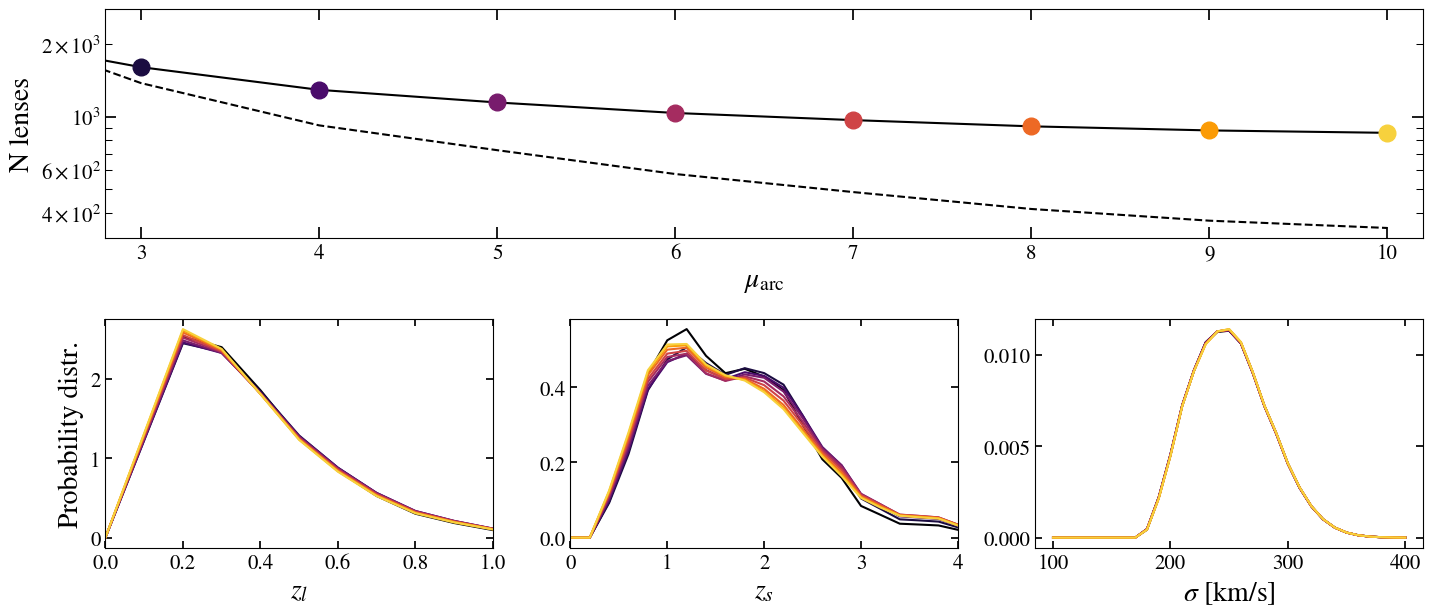

In [21]:
### COMPUTING effect of mu_arc on the number of lenses and the parameters distributions ###
title = 'CFHTLS i band'
#arc_mu_thr = 3
min_SNR    = 20
survey_params = utils.read_survey_params('CFHTLS i band', VERBOSE = 0)
limit    = survey_params['limit']
cut      = survey_params['cut']
area     = survey_params['area']
seeing   = survey_params['seeing']
exp_time_sec = survey_params['exp_time_sec']
zero_point_m = survey_params['zero_point_m']
sky_bckgnd_m = survey_params['sky_bckgnd_m']
photo_band   = survey_params['photo_band']
zl_array_CFHTLS = np.linspace(0.2 , 1.0 , 9)
zs_array_CFHTLS = np.linspace(0.2 , 4   , 20)
sg_array_CFHTLS = np.linspace(100 , 400 , 31)
_title_ = 'CFHTLS i band_mu_arc_'
cut   = limit
arc_mu_thr_array = np.arange(2, 11, 1)
gal_num_vs_mcut, gal_num_vs_mcut_LL = np.zeros(0), np.zeros(0)
for aid, arc_mu_thr in enumerate(arc_mu_thr_array):
    title = _title_ + str(aid)
    try:
        # raise(ValueError)
        matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL = utils.load_pickled_files(title)
    except ValueError:
        #print('FILE do NOT exist - RUNNING MODEL')
        matrix_noLL, Theta_E_noLL, prob_noLL = ls.calculate_num_lenses_and_prob(
                                                                    sg_array_CFHTLS, zl_array_CFHTLS, zs_array_CFHTLS, M_array, limit, area,
                                                                    seeing, min_SNR, exp_time_sec, sky_bckgnd_m, zero_point_m,
                                                                    photo_band = photo_band, mag_cut=cut, arc_mu_threshold = arc_mu_thr,
                                                                    LENS_LIGHT_FLAG = False, SIE_FLAG = True)
        print('FILE do NOT exist - RUNNING MODEL LL')
        matrix_LL, Theta_E_LL, prob_LL = ls.calculate_num_lenses_and_prob(
                                                                    sg_array_CFHTLS, zl_array_CFHTLS, zs_array_CFHTLS, M_array, limit, area,
                                                                    seeing, min_SNR, exp_time_sec, sky_bckgnd_m, zero_point_m,
                                                                    photo_band = photo_band, mag_cut=cut, arc_mu_threshold = arc_mu_thr,
                                                                    LENS_LIGHT_FLAG = True, SIE_FLAG = False)

        utils.save_pickled_files(title,  matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL)
    gal_num_vs_mcut = np.append(gal_num_vs_mcut, np.sum(matrix_noLL))
    gal_num_vs_mcut_LL = np.append(gal_num_vs_mcut_LL, np.sum(matrix_LL))

line_c, cmap_c, _col_, col_A, col_B, col_C, col_D, fn_prefix = lens_plot.set_plt_param(___PLOT_FOR_KEYNOTE___)
_c_ = 'w' if ___PLOT_FOR_KEYNOTE___ else 'k'
fig = plt.figure(figsize=(17, 7))
grid = plt.GridSpec(2, 3, wspace=0.2, hspace=0.35)
ax1 = fig.add_subplot(grid[0, :])
ax2 = fig.add_subplot(grid[1, 0])
ax3 = fig.add_subplot(grid[1, 1])
ax4 = fig.add_subplot(grid[1, 2])
ax1.plot(arc_mu_thr_array, gal_num_vs_mcut, c = _c_)
ax1.plot(arc_mu_thr_array, gal_num_vs_mcut_LL, c = _c_, ls='--')
_col_  = iter(cmap_c(np.linspace(0, 1, len(arc_mu_thr_array)+1)))
for aid, arc_mu_thr in enumerate(arc_mu_thr_array):
    ccc = next(_col_)
    title = _title_ + str(aid)
    matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL = utils.load_pickled_files(title)
    _ , __  , ___, P_zs_LL   , P_zl_LL  , P_sg_LL   = ls.get_N_and_P_projections(matrix_LL, sg_array_CFHTLS, zl_array_CFHTLS, zs_array_CFHTLS, SMOOTH=0)
    _ , __  , ___, P_zs_noLL , P_zl_noLL  , P_sg_noLL   = ls.get_N_and_P_projections(matrix_noLL, sg_array_CFHTLS, zl_array_CFHTLS, zs_array_CFHTLS, SMOOTH=0)
    _ , __  , ___, P_zs_LL_sm   , P_zl_LL_sm  , P_sg_LL_sm   = ls.get_N_and_P_projections(matrix_LL, sg_array_CFHTLS, zl_array_CFHTLS, zs_array_CFHTLS, SMOOTH=1)
    _ , __  , ___, P_zs_noLL_sm , P_zl_noLL_sm  , P_sg_noLL_sm   = ls.get_N_and_P_projections(matrix_noLL, sg_array_CFHTLS, zl_array_CFHTLS, zs_array_CFHTLS, SMOOTH=1)

    ax1.plot(arc_mu_thr, np.sum(matrix_noLL), marker='o', c = ccc, ms = 12)
    ax2.plot(np.append(0,zl_array_CFHTLS), np.append(0,P_zl_noLL), c=ccc, ls='-', label=str(limit - dlt))
    ax3.plot(np.append(0,zs_array_CFHTLS), np.append(0,P_zs_noLL_sm), c=ccc, ls='-')
    ax4.plot(sg_array_CFHTLS, P_sg_noLL, c=ccc, ls='-')
#ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim((2.8,10.2))
ax2.set_xlim((0,1.))
ax3.set_xlim((0,4.))
__size_labels__, __size_ticks__ = 20, 15
ax1.set_xlabel(r'$\mu_\text{arc}$', fontsize=__size_labels__)
ax1.set_ylabel(r'N lenses' , fontsize=__size_labels__)
ax2.set_xlabel(r'$z_l$'    , fontsize=__size_labels__)
ax3.set_xlabel(r'$z_s$'    , fontsize=__size_labels__)
ax4.set_xlabel(r'$\sigma$ [km/s]', fontsize=__size_labels__)
ax2.set_ylabel(r'Probability distr.', fontsize=__size_labels__)
ax1.tick_params(axis='both', which = 'major', labelsize=__size_ticks__, direction = 'in', length = 8)
ax1.tick_params(axis='both', which = 'minor', labelsize=__size_ticks__, direction = 'in', length = 5)
ax2.tick_params(axis='both', which = 'both', labelsize=__size_ticks__, direction = 'in', length = 5)
ax3.tick_params(axis='both', which = 'both', labelsize=__size_ticks__, direction = 'in', length = 5)
ax4.tick_params(axis='both', which = 'both', labelsize=__size_ticks__, direction = 'in', length = 5)
plt.savefig('img/effect_muarc.png', dpi=200, bbox_inches='tight')
plt.show()

In [22]:
arc_mu_thr_array[1:3], gal_num_vs_mcut[2]/gal_num_vs_mcut[1] * 0.25, gal_num_vs_mcut_LL[2]/gal_num_vs_mcut_LL[1] * 0.25

(array([3, 4]), 0.20130322715009216, 0.16695679512962325)

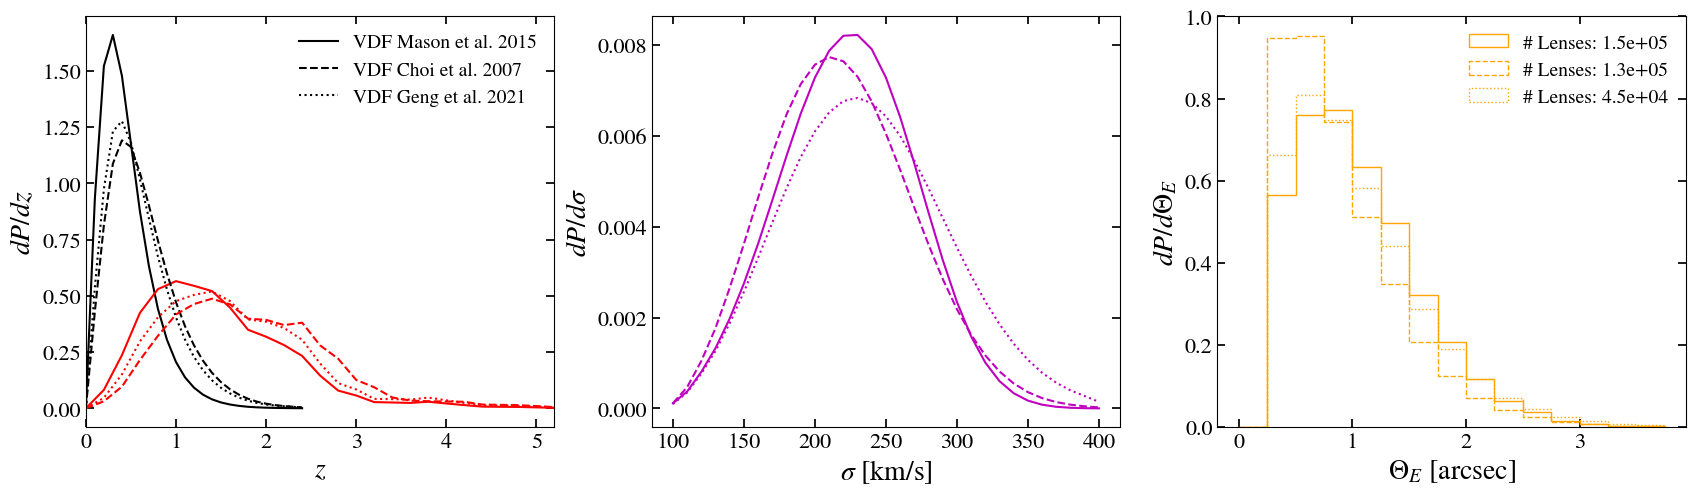

In [23]:
#Comparing the effect of vel disp functions
lens_plot.plot_effect_vel_disp_function(zl_array, zs_array, sigma_array, PLOT_FOR_KEYNOTE = 0, LENS_LIGHT = 0, SMOOTH = 1, READ_FILES = 1, SAVE=1)
# lens_plot.plot_effect_vel_disp_function(zl_array, zs_array, sigma_array, PLOT_FOR_KEYNOTE = ___PLOT_FOR_KEYNOTE___, LENS_LIGHT = 1, SMOOTH = 0, SAVE = 0)

In [24]:
def get_param_space_idx_from_obs_constraints(CW_ER_zl, CW_ER_zs, E_ring_rad, zs_array, zl_array, sigma_array):
    m_sg = np.zeros((len(zs_array), len(zl_array)))
    for izs, _zs in enumerate(zs_array):
        for izl, _zl in enumerate(zl_array):
            if((_zs>_zl) and (_zs>CW_ER_zs[0]-CW_ER_zs[2]) and (_zs<CW_ER_zs[0]+CW_ER_zs[1])):
                if((_zl>CW_ER_zl[0]-CW_ER_zl[2]) and (_zl<CW_ER_zl[0]+CW_ER_zl[1])):
                    m_sg[izs][izl] = sigma_from_R_Ein(_zs, _zl, E_ring_rad)
    sig_nozero_idx = np.zeros(0).astype(int)
    for sg_from_RE in m_sg[np.where(m_sg > 0)]:
            sig_nozero_idx = np.append(sig_nozero_idx, int(np.argmin(np.abs(sigma_array-sg_from_RE))))
    zs_nozero_idx, zl_nozero_idx = np.where(m_sg > 0)[0], np.where(m_sg > 0)[1]
    return zl_nozero_idx, zs_nozero_idx, sig_nozero_idx

def prob_for_obs_conf_in_param_space_per_sq_degree(survey_title,
                                                    CW_ER_zl, CW_ER_zs, E_ring_rad,
                                                    zs_array, zl_array, sigma_array, CHECK_LL = True):
    survey_params = utils.read_survey_params(survey_title, VERBOSE = 0)
    area     = survey_params['area']
    matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL = utils.load_pickled_files(survey_title)
    Ngal_zl_sigma_LL, Ngal_zs_sigma_LL, Ngal_zs_zl_LL, _ , __ , ___ = get_N_and_P_projections(matrix_LL, sigma_array, zl_array, zs_array, SMOOTH=1)
    mat = matrix_LL if CHECK_LL else matrix_noLL
    res = 0
    zl_nozero_idx, zs_nozero_idx, sig_nozero_idx = get_param_space_idx_from_obs_constraints(CW_ER_zl, CW_ER_zs, E_ring_rad, zs_array, zl_array, sigma_array)
    for src, sig, lns in zip(zs_nozero_idx, sig_nozero_idx, zl_nozero_idx):
        res = res + mat[src][sig][lns]
    return res/area

In [25]:
utils.print_summary_surveys(surveys_titles)

|     Survey - Filter     | PSF/Seeing ["] | Area [deg^2] | m_cut [mag] | m_lim [mag] |   N_lenses (LL)   |   N_lenses (LL)   | N [deg^-1] |
|                         |                |              |             |             | VDF: Mason + 2015 |  VDF: Geng + 2021 |            |

|    COSMOS HST i band    |           0.120|         1.600|         25.0|         26.5|       36 (  17   )|       11 (   7   )|   11 - 4   |
|      CFHTLS i band      |           0.620|       170.000|         24.5|         25.1|      975 (  525  )|      268 (  185  )|    3 - 1   |
|SUBARU HSC SuGOHI i band |           0.600|      1400.000|         26.2|         26.2|  5.2e+04 (2.8e+04)|  1.6e+04 (1.2e+04)|   20 - 8   |
|       DES i band        |           0.960|      5000.000|         23.0|         24.7|     1822 (  828  )|      440 (  269  )|    0 - 0   |
|    COSMOS Web F115W     |           0.040|         0.540|         26.8|         27.1|       46 (  15   )|       16 (   8   )|   28 - 14  |
|    COSMOS 

0.2345521191508553 0.005089413370674725


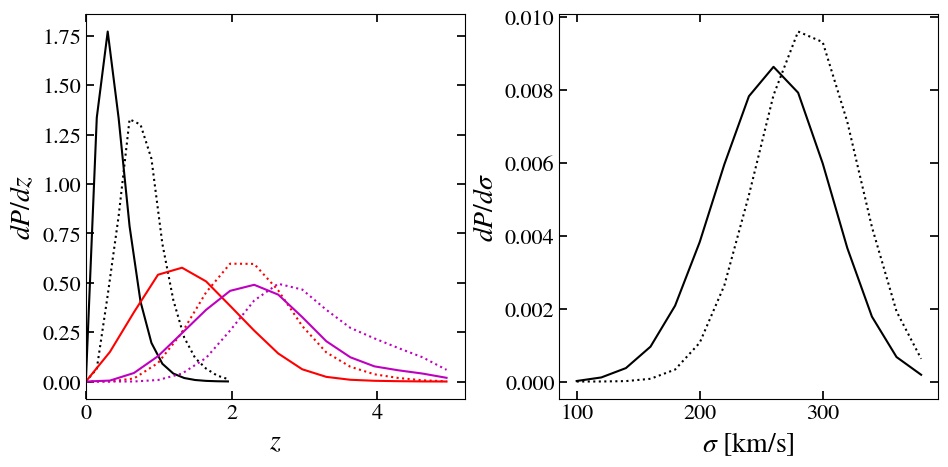

In [26]:
# Testing double lenses distributions

_test_dbl_sigma_array = np.arange(100 , 400 , 20  )
_test_dbl_zl_array    = np.arange(0.  , 2.0 , 0.15)
_test_dbl_zs_array    = np.arange(0.  , 5.0 , 0.33)

# for title in ['EUCLID Wide VIS double lens']:
for title in ['PEARLS NEP F150W double lens']:
   survey_params = utils.read_survey_params(' '.join(title.split()[:-2]), VERBOSE = 0)
   limit    = survey_params['limit']
   cut      = survey_params['cut']
   area     = survey_params['area']
   seeing   = survey_params['seeing']
   exp_time_sec = survey_params['exp_time_sec']
   zero_point_m = survey_params['zero_point_m']
   sky_bckgnd_m = survey_params['sky_bckgnd_m']
   photo_band   = survey_params['photo_band']

   try:
      # raise (ValueError)
      matrix_LL, Theta_E_LL_z1, Theta_E_LL_z2, prob_LL, matrix_noLL, Theta_E_noLL_z1, Theta_E_noLL_z2, prob_noLL = utils.load_pickled_files(title, DOUBLE_LENS = 1)
   except ValueError:
      print('FILE do NOT exist - RUNNING MODEL')
      matrix_noLL, Theta_E_noLL_z1, Theta_E_noLL_z2, prob_noLL = rls.calculate_num_double_lenses_and_prob(
                                                                  _test_dbl_sigma_array, _test_dbl_zl_array, _test_dbl_zs_array, M_array, limit, area,
                                                                  seeing, min_SNR, exp_time_sec, sky_bckgnd_m, zero_point_m,
                                                                  photo_band = photo_band, mag_cut=cut, arc_mu_threshold = arc_mu_thr,
                                                                  LENS_LIGHT_FLAG = False, SIE_FLAG = True)
      print((np.sum(matrix_noLL)))
      matrix_LL, Theta_E_LL_z1, Theta_E_LL_z2, prob_LL = rls.calculate_num_double_lenses_and_prob(
                                                                  _test_dbl_sigma_array, _test_dbl_zl_array, _test_dbl_zs_array, M_array, limit, area,
                                                                  seeing, min_SNR, exp_time_sec, sky_bckgnd_m, zero_point_m,
                                                                  photo_band = photo_band, mag_cut=cut, arc_mu_threshold = arc_mu_thr,
                                                                  LENS_LIGHT_FLAG = True, SIE_FLAG = True)
      utils.save_pickled_files(title,  matrix_LL, (Theta_E_LL_z1, Theta_E_LL_z2), prob_LL, matrix_noLL, (Theta_E_noLL_z1, Theta_E_noLL_z2), prob_noLL, DOUBLE_LENS = 1)

   Ngal_zl_sigma, Ngal_zl_sigma, Ngal_zl_zs1, Ngal_zl_zs2, Ngal_sigma_zs1, Ngal_sigma_zs2, Ngal_zs1_zs2, P_zs1, P_zs2, P_zl, P_sg = rls.get_N_and_P_projections_double_lens(matrix_noLL, _test_dbl_sigma_array, _test_dbl_zl_array, _test_dbl_zs_array, SMOOTH=True)

   # utils.print_summary_surveys([' '.join(title.split()[:-2])])
   # lens_plot.set_plt_param(PLOT_FOR_KEYNOTE = ___PLOT_FOR_KEYNOTE___)
   # fig, ax = plt.subplots(2, 2, figsize=(11, 10), sharex=False, sharey=False)
   # plt.subplots_adjust(wspace=.15, hspace=.2)
   # lens_plot.plot_z_sigma_distributions(fig, ax, title, _test_dbl_zl_array, _test_dbl_zs_array, _test_dbl_sigma_array,
   #                               (Theta_E_LL_z1, Theta_E_LL_z2), matrix_LL, (Theta_E_noLL_z1, Theta_E_noLL_z2), matrix_noLL,
   #                               PLOT_FOR_KEYNOTE = ___PLOT_FOR_KEYNOTE___, CONTOUR = 0,
   #                               LOG = 0, SMOOTH = 1, SAVE = 1, DOUBLE_LENS = 1)
   # plt.show()
   print((np.sum(matrix_noLL)), (np.sum(matrix_LL)))
   lens_plot_paper.plot_z_sigma_distributions_double_lenses(title, _test_dbl_zl_array, _test_dbl_zs_array, _test_dbl_sigma_array, matrix_LL, matrix_noLL, PLOT_FOR_KEYNOTE = ___PLOT_FOR_KEYNOTE___, SMOOTH = 1, SAVE = 1)

5388.687887623486 14688.940118632885


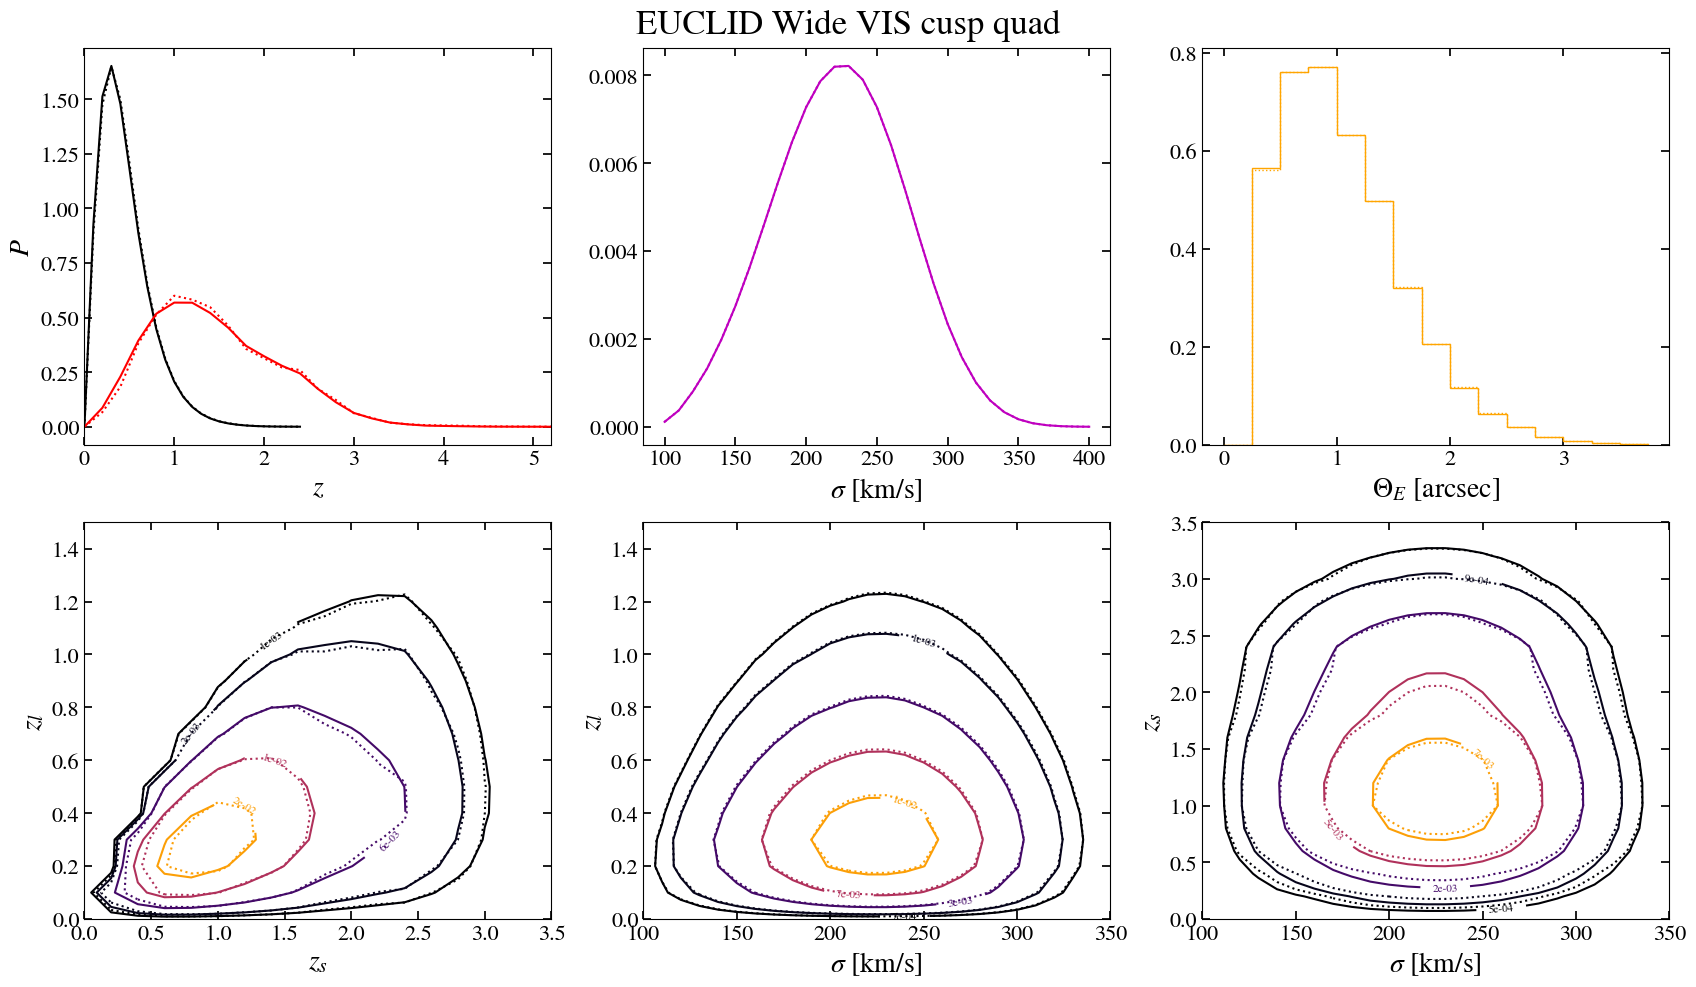

In [27]:
# Testing double lenses distributions

for title in ['EUCLID Wide VIS cusp quad']:
   survey_params = utils.read_survey_params(' '.join(title.split()[:-2]), VERBOSE = 0)
   limit    = survey_params['limit']
   cut      = survey_params['cut']
   area     = survey_params['area']
   seeing   = survey_params['seeing']
   exp_time_sec = survey_params['exp_time_sec']
   zero_point_m = survey_params['zero_point_m']
   sky_bckgnd_m = survey_params['sky_bckgnd_m']
   photo_band   = survey_params['photo_band']

   try:
      # raise (ValueError)
      matrix_cusp, Theta_E_cusp, _, matrix_quad, Theta_E_quad, __ = utils.load_pickled_files(title, DOUBLE_LENS = 0)
   except ValueError:
      print('FILE do NOT exist - RUNNING MODEL')
      matrix_cusp, matrix_quad, Theta_E  = ls.calculate_num_quad_cusps_lenses(
                                            sigma_array, zl_array, zs_array, M_array, limit, area,
                                            seeing, min_SNR, exp_time_sec, sky_bckgnd_m, zero_point_m,
                                            photo_band = photo_band, mag_cut=cut, arc_mu_threshold = arc_mu_thr,
                                            LENS_LIGHT_FLAG = False, SIE_FLAG = True)
      Theta_E_cusp, Theta_E_quad = Theta_E, Theta_E
      utils.save_pickled_files(title,  matrix_cusp, Theta_E, np.zeros(0), matrix_quad, Theta_E, np.zeros(0), DOUBLE_LENS = 0)

   Ngal_zl_sigma_cusp, Ngal_sigma_zs_cusp, Ngal_zl_zs_cusp, P_zs_cusp, P_zl_cusp, P_sg_cusp = ls.get_N_and_P_projections(matrix_cusp, sigma_array, zl_array, zs_array, SMOOTH=True)
   Ngal_zl_sigma_quad, Ngal_sigma_zs_quad, Ngal_zl_zs_quad, P_zs_quad, P_zl_quad, P_sg_quad = ls.get_N_and_P_projections(matrix_quad, sigma_array, zl_array, zs_array, SMOOTH=True)

   # utils.print_summary_surveys([' '.join(title.split()[:-2])])
   # lens_plot.set_plt_param(PLOT_FOR_KEYNOTE = ___PLOT_FOR_KEYNOTE___)
   # fig, ax = plt.subplots(2, 2, figsize=(11, 10), sharex=False, sharey=False)
   # plt.subplots_adjust(wspace=.15, hspace=.2)
   # lens_plot.plot_z_sigma_distributions(fig, ax, title, _test_dbl_zl_array, _test_dbl_zs_array, _test_dbl_sigma_array,
   #                               (Theta_E_LL_z1, Theta_E_LL_z2), matrix_LL, (Theta_E_noLL_z1, Theta_E_noLL_z2), matrix_noLL,
   #                               PLOT_FOR_KEYNOTE = ___PLOT_FOR_KEYNOTE___, CONTOUR = 0,
   #                               LOG = 0, SMOOTH = 1, SAVE = 1, DOUBLE_LENS = 1)
   # plt.show()
   print(np.sum(matrix_cusp), np.sum(matrix_quad))
   lens_plot.plot_ALL_distributions(title, zl_array, zs_array, sigma_array,
                                   Theta_E_cusp, matrix_cusp, Theta_E_quad, matrix_quad,
                                   PLOT_FOR_KEYNOTE = ___PLOT_FOR_KEYNOTE___, SMOOTH = 1, SAVE = 0)

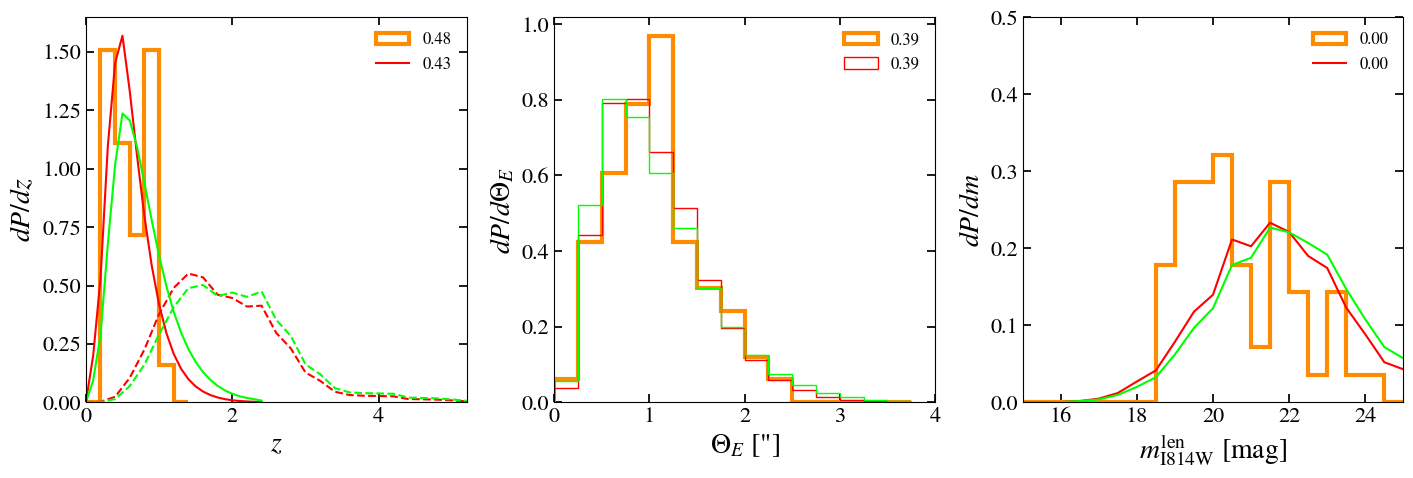

In [28]:
import pandas as pd
from scipy import integrate
from scipy.stats import kstest

FAURE_A_data  = pd.read_csv('../galess/data/LENS_SEARCHES/FAURE_2008/FAURE_A.csv')
FAURE_A_names = FAURE_A_data['Cosmos Name'].to_numpy()
FAURE_A_zl    = FAURE_A_data['z_l'].to_numpy()
FAURE_A_Rarc  = FAURE_A_data['R_arc'].to_numpy()
FAURE_A_Reff  = FAURE_A_data['Reff'].to_numpy()
FAURE_A_m_Ib  = FAURE_A_data['mag_814W'].to_numpy()
FAURE_A_ell   = FAURE_A_data['ell'].to_numpy()
FAURE_A_m_src = FAURE_A_data['mag_814W_src'].to_numpy()

FAURE_B_data  = pd.read_csv('../galess/data/LENS_SEARCHES/FAURE_2008/FAURE_B.csv')
FAURE_B_names = FAURE_B_data['Cosmos Name'].to_numpy()
FAURE_B_zl    = FAURE_B_data['z_l'].to_numpy()
FAURE_B_Rarc  = FAURE_B_data['R_arc'].to_numpy()
FAURE_B_Reff  = FAURE_B_data['Reff'].to_numpy()
FAURE_B_m_Ib  = FAURE_B_data['mag_814W'].to_numpy()
FAURE_B_ell   = FAURE_B_data['ell'].to_numpy()
FAURE_B_m_src = FAURE_B_data['mag_814W_src'].to_numpy()
_nbins_zl = np.arange(0.0, 1.6, 0.2 )
_nbins_zs = np.arange(0.0, 5  , 0.5 )
_nbins_sg = np.arange(100, 400, 25  )
_nbins_Re = np.arange(0  , 4  , 0.25)
m_obs = np.linspace(15, 30, 31)
line_thick = 3
ER_col1, cc2  = 'darkorange', 'lime'
_ALPHA_ = 1
sg_array_Faure = np.linspace(150 , 400 , 26) #sort of equiv to M_V<-20
title = 'COSMOS HST i band FAURE'
matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL = utils.load_pickled_files(title)
_ , __  , ___, P_zs_LL  , P_zl_LL  , P_sg_LL   = ls.get_N_and_P_projections(matrix_LL, sg_array_Faure, zl_array, zs_array, SMOOTH=1)
_ , __  , ___, P_zs_noLL  , P_zl_noLL  , P_sg_noLL   = ls.get_N_and_P_projections(matrix_noLL, sg_array_Faure, zl_array, zs_array, SMOOTH=1)
if 1: matrix, Theta_E, prob, P_zs, P_zl, P_sg = matrix_LL, Theta_E_LL, prob_LL, P_zs_LL, P_zl_LL, P_sg_LL
else: matrix, Theta_E, prob, P_zs, P_zl, P_sg = matrix_noLL, Theta_E_noLL, prob_noLL, P_zs_noLL, P_zl_noLL, P_sg_noLL
ccc = 'r'
fig, ax = plt.subplots(1, 3, figsize=(17, 5), sharex=False, sharey=False)
plt.subplots_adjust(wspace=.23, hspace=.2)
F_zl_hist = ax[0].hist( np.append(FAURE_A_zl,  FAURE_B_zl)          , bins=_nbins_zl, density=True, histtype='step', lw=line_thick, color=ER_col1, alpha = _ALPHA_, label=f'Faure 2008 - Full Sample ({len(np.append(FAURE_A_zl,  FAURE_B_zl))})')
F_Ra_hist = ax[1].hist( np.append(FAURE_A_Rarc/1.5,FAURE_B_Rarc/1.5), bins=_nbins_Re, density=True, histtype='step', lw=line_thick, color=ER_col1, alpha = _ALPHA_)
F_mI_hist = ax[2].hist( np.append(FAURE_A_m_Ib, FAURE_B_m_Ib)       , bins=m_obs  , density=True, histtype='step', lw=line_thick, color=ER_col1, alpha = _ALPHA_)
ax[0].plot(zl_array, P_zl, c=ccc, ls='-', label=title)
ax[0].plot(zs_array, P_zs, c=ccc, ls='--')
ax[0].set_xlim((0,5.2))
ax[0].set_xlabel(r'$z$', fontsize=20)
ax[0].set_ylabel(r'$dP/dz$', fontsize=20)
T_hist_Mason = ax[1].hist(np.ravel(Theta_E), weights=np.ravel(matrix), bins = _nbins_Re,
            range=(0, 3), density=True, histtype='step', color=ccc, ls = '-', label=title)
ax[1].set_xlabel(r'$\Theta_E$ ["]', fontsize=20)
ax[1].set_ylabel(r'$dP/d\Theta_E$', fontsize=20)
ax[1].set_xlim((0,4))
m_lens = ls.get_len_magnitude_distr(m_obs, zl_array, sg_array_Faure, matrix)
norm = integrate.simps(m_lens, m_obs)
ax[2].plot(m_obs, m_lens/norm, color=ccc)
ax[2].set_xlabel(r'$m_\text{I814W}^\text{len}$ [mag]', fontsize=20)
ax[2].set_ylabel(r'$dP/dm$', fontsize=20)
ax[2].set_xlim((15,25))
ax[2].set_ylim((0,0.5))

pval_zl_Mason = kstest(F_zl_hist[0], P_zl)[1]
pval_Ra_Mason = kstest(F_Ra_hist[0], T_hist_Mason[0])[1]
pval_mI_Mason = kstest(F_mI_hist[0], m_lens/norm)[1]

title = 'COSMOS HST i band FAURE Geng'
matrix_LL, Theta_E_LL, prob_LL, matrix_noLL, Theta_E_noLL, prob_noLL = utils.load_pickled_files(title)
_ , __  , ___, P_zs_LL  , P_zl_LL  , P_sg_LL   = ls.get_N_and_P_projections(matrix_LL, sg_array_Faure, zl_array, zs_array, SMOOTH=1)
_ , __  , ___, P_zs_noLL  , P_zl_noLL  , P_sg_noLL   = ls.get_N_and_P_projections(matrix_noLL, sg_array_Faure, zl_array, zs_array, SMOOTH=1)
if 1: matrix, Theta_E, prob, P_zs, P_zl, P_sg = matrix_LL, Theta_E_LL, prob_LL, P_zs_LL, P_zl_LL, P_sg_LL
else: matrix, Theta_E, prob, P_zs, P_zl, P_sg = matrix_noLL, Theta_E_noLL, prob_noLL, P_zs_noLL, P_zl_noLL, P_sg_noLL
ax[0].plot(zl_array, P_zl, c=cc2, ls='-', label=title)
ax[0].plot(zs_array, P_zs, c=cc2, ls='--')
ax[0].set_xlim((0,5.2))
ax[0].set_xlabel(r'$z$', fontsize=20)
ax[0].set_ylabel(r'$dP/dz$', fontsize=20)
T_hist_Geng = ax[1].hist(np.ravel(Theta_E), weights=np.ravel(matrix), bins = _nbins_Re,
            range=(0, 3), density=True, histtype='step', color=cc2, ls = '-', label=title)
ax[1].set_xlabel(r'$\Theta_E$ ["]', fontsize=20)
ax[1].set_ylabel(r'$dP/d\Theta_E$', fontsize=20)
ax[1].set_xlim((0,4))
m_lens = ls.get_len_magnitude_distr(m_obs, zl_array, sg_array_Faure, matrix)
norm = integrate.simps(m_lens, m_obs)
ax[2].plot(m_obs, m_lens/norm, color=cc2)
ax[2].set_xlabel(r'$m_\text{I814W}^\text{len}$ [mag]', fontsize=20)
ax[2].set_ylabel(r'$dP/dm$', fontsize=20)
ax[2].set_xlim((15,25))
ax[2].set_ylim((0,0.5))

pval_zl_Geng = kstest(F_zl_hist[0], P_zl)[1]
pval_Ra_Geng = kstest(F_Ra_hist[0], T_hist_Geng[0])[1]
pval_mI_Geng = kstest(F_mI_hist[0], m_lens/norm)[1]

ax[0].legend([f'{(pval_zl_Mason):.2f}', f'{(pval_zl_Geng):.2f}'], fontsize = 12)
ax[1].legend([f'{(pval_Ra_Mason):.2f}', f'{(pval_Ra_Geng):.2f}'], fontsize = 12)
ax[2].legend([f'{(pval_mI_Mason):.2f}', f'{(pval_mI_Geng):.2f}'], fontsize = 12)
plt.show()